# データの読み込み

In [126]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# csvデータの読み込み
df = pd.read_csv('housing.csv')

In [4]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布の確認

In [5]:
import seaborn as sns

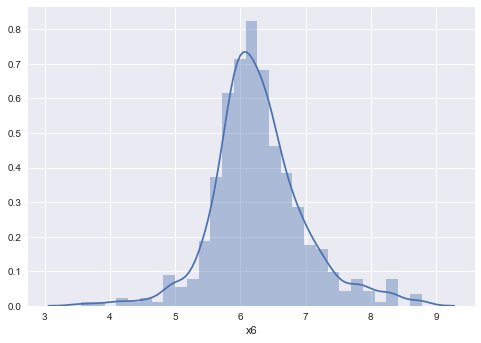

In [6]:
sns.distplot(df['x6'])

# 外れ値除去(3σ法)

In [7]:
col = 'x6'

In [8]:
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [9]:
# 平均
mean[col]

6.284634387351788

In [10]:
# 標準偏差(standard deviation)
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [11]:
sigma[col]

0.7026171434153234

In [12]:
# 3σ分引く
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [13]:
# 3σ分足す
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [14]:
# フィルタリング
df2 =df[(df[col] > low) & (df[col] < high)]

In [15]:
len(df)

506

In [16]:
len(df2)

498

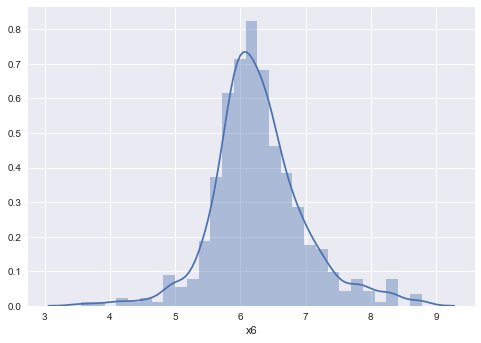

In [17]:
# 分布の再確認(オリジナル)
sns.distplot(df['x6'])

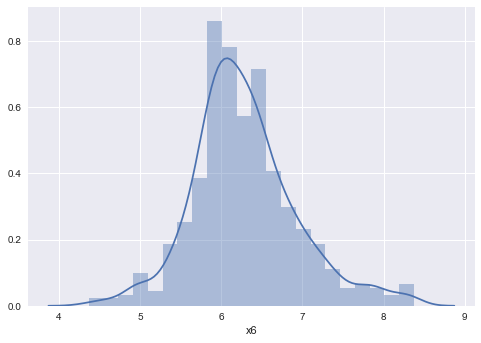

In [18]:
# 分布の再確認(外れ値除去)
sns.distplot(df2['x6'])

In [19]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [20]:
_df = df
for col in cols:
    # 3σ法の上下限値を設定
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    # 条件での絞り込み
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [21]:
#オリジナル
len(df)

506

In [22]:
# 3σ法適用後
len(_df)

415

- 3σ法は正規分布を想定されているので正規分布ではないと減る件数が増えてしまう
- 変数が多ければ多いほど、減る件数は多い

### 主な外れ値の対処法
- 外れ値を取り除く
- 外れ値を平均値または、中央値などで埋める
- 主成分分析などを使って、潜在変数に変換した後に3σ法を適用 ← 高度

### 入力変数と出力変数に分割


In [23]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [24]:
# df.iloc[行, 列]
X = _df.iloc[:, :-1]
y = _df.iloc[:,-1]

### 訓練データと検証データの分割

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# モデルの宣言
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# 検証 ← 訓練データ
model.score(X_train, y_train)

0.7972109224535133

In [31]:
# 検証 ← テストデータ
model.score(X_test, y_test)

0.6253776004329572

### 過学習(オーバーフィッティング)が起きている

スケーリング
-----------------

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# scalerの宣言
scaler = StandardScaler()

In [34]:
# scalerの学習 ← 平均と標準偏差を計算
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

- 必ず訓練データで行う

In [35]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# 検証 ← 訓練データ
model.score(X_train2, y_train)

0.7972109224535134

In [39]:
model.score(X_test2, y_test)

0.6253776004329595

- 重回帰分析はスケーリングで精度が変わるアルゴリズムではないため結果は変わらない

In [40]:
# 重みの確認
np.set_printoptions(precision=3, suppress=True)
model.coef_

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

- x6, x13あたりが強く影響している

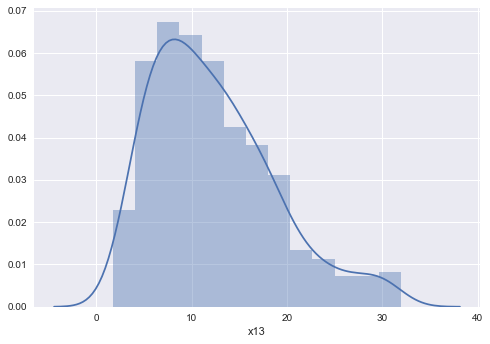

In [41]:
sns.distplot(_df['x13'])

### SVMでやってみる

In [42]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf', C=100, gamma=0.2)

In [43]:
svm.fit(X_train2, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.2,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
svm.score(X_train2, y_train)

0.9889417800777777

In [45]:
svm.score(X_test2, y_test)

0.7723444020535662

### ランダムフォレスト

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(random_state=1, n_estimators=100).fit(X_train2, y_train)


In [47]:
tree.score(X_train2, y_train)

0.9758306763236496

In [48]:
tree.score(X_test2, y_test)

0.7487616610657217

In [108]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(solver='lbfgs', random_state=0, alpha=1.0, hidden_layer_sizes=[7]).fit(X_train2, y_train)
print(mlp.score(X_train2, y_train))
print(mlp.score(X_test2, y_test))

0.9343597139748617
0.8162271182181904


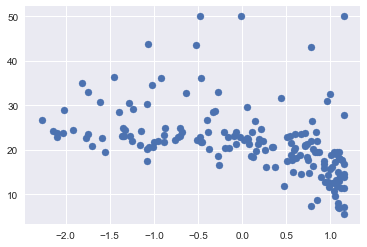

In [139]:
plt.scatter(X_test2[:,6], y_test)
plt.plot(X_test2, mlp.predict())